In [ ]:
!pip install netCDF4

In [11]:
import pandas as pd
import os
import boto3
import botocore
import netCDF4
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import *

s3 = boto3.resource('s3')
# select bucket
my_bucket = s3.Bucket("forcasting-project-group")

In [3]:
# download file into current directory
for object in my_bucket.objects.all():
    # Need to split object.key into path and file name, else it will give error file not found.
    path, filename = os.path.split(object.key)
    if path == 'gefs_train/train':
        targetname = 'test/' + filename
        my_bucket.download_file(object.key, targetname)
    if len(path) == 0:
        my_bucket.download_file(object.key, filename)

In [75]:
###create a NetCDF Dataset object:
apcp = netCDF4.Dataset('test/apcp_sfc_latlon_subset_19940101_20071231.nc')
# print(apcp)
# get all variable names
print(apcp.variables.keys()) 

dlwrf = netCDF4.Dataset('test/dlwrf_sfc_latlon_subset_19940101_20071231.nc')
print(dlwrf.variables.keys()) 

dswrf = netCDF4.Dataset('test/dswrf_sfc_latlon_subset_19940101_20071231.nc')
print(dswrf.variables.keys()) 

pres = netCDF4.Dataset('test/pres_msl_latlon_subset_19940101_20071231.nc')
print(pres.variables.keys()) 

pwat = netCDF4.Dataset('test/pwat_eatm_latlon_subset_19940101_20071231.nc')
print(pwat.variables.keys()) 

spfh = netCDF4.Dataset('test/spfh_2m_latlon_subset_19940101_20071231.nc')
print(spfh.variables.keys()) 

tcdc = netCDF4.Dataset('test/tcdc_eatm_latlon_subset_19940101_20071231.nc')
print(tcdc.variables.keys()) 

tcolc = netCDF4.Dataset('test/tcolc_eatm_latlon_subset_19940101_20071231.nc')
print(tcolc.variables.keys()) 

tmax = netCDF4.Dataset('test/tmax_2m_latlon_subset_19940101_20071231.nc')
print(tmax.variables.keys()) 

tmin = netCDF4.Dataset('test/tmin_2m_latlon_subset_19940101_20071231.nc')
print(tmin.variables.keys()) 

tmp2m = netCDF4.Dataset('test/tmp_2m_latlon_subset_19940101_20071231.nc')
print(tmp2m.variables.keys()) 

tmpsfc = netCDF4.Dataset('test/tmp_sfc_latlon_subset_19940101_20071231.nc')
print(tmpsfc.variables.keys()) 

ulwrf_sfc = netCDF4.Dataset('test/ulwrf_sfc_latlon_subset_19940101_20071231.nc')
print(ulwrf_sfc.variables.keys()) 

ulwrf_tatm = netCDF4.Dataset('test/ulwrf_tatm_latlon_subset_19940101_20071231.nc')
print(ulwrf_tatm.variables.keys()) 

uswrf_sfc = netCDF4.Dataset('test/uswrf_sfc_latlon_subset_19940101_20071231.nc')
print(uswrf_sfc.variables.keys()) 

odict_keys(['time', 'intTime', 'lat', 'lon', 'ens', 'fhour', 'intValidTime', 'Total_precipitation'])
odict_keys(['time', 'intTime', 'lat', 'lon', 'ens', 'fhour', 'intValidTime', 'Downward_Long-Wave_Rad_Flux'])
odict_keys(['time', 'intTime', 'lat', 'lon', 'ens', 'fhour', 'intValidTime', 'Downward_Short-Wave_Rad_Flux'])
odict_keys(['time', 'intTime', 'lat', 'lon', 'ens', 'fhour', 'intValidTime', 'Pressure'])
odict_keys(['time', 'intTime', 'lat', 'lon', 'ens', 'fhour', 'intValidTime', 'Precipitable_water'])
odict_keys(['time', 'intTime', 'lat', 'lon', 'ens', 'fhour', 'intValidTime', 'Specific_humidity_height_above_ground'])
odict_keys(['time', 'intTime', 'lat', 'lon', 'ens', 'fhour', 'intValidTime', 'Total_cloud_cover'])
odict_keys(['time', 'intTime', 'lat', 'lon', 'ens', 'fhour', 'intValidTime', 'Total_Column-Integrated_Condensate'])
odict_keys(['time', 'intTime', 'lat', 'lon', 'ens', 'fhour', 'intValidTime', 'Maximum_temperature'])
odict_keys(['time', 'intTime', 'lat', 'lon', 'ens', 'fh

In [17]:
# check the dimension size of this variable individually:
# for d in apcp.dimensions.items():
#     print(d)
    
for varname in tcdc.variables.keys():
    var = tcdc.variables[varname]
    print(varname, var.dtype, var.dimensions, var.shape)

#For this solar prediction study the two elements of interest are the dimensions and variables.
#Let's look at the categories
print('Dimensions')
for v in tcdc.dimensions.keys():
    print(v)
print('Varaiables')
for v in tcdc.variables.keys():
    print(v)

time float64 ('time',) (5113,)
intTime int32 ('time',) (5113,)
lat float32 ('lat',) (9,)
lon float32 ('lon',) (16,)
ens int16 ('ens',) (11,)
fhour int32 ('fhour',) (5,)
intValidTime int32 ('time', 'fhour') (5113, 5)
Total_cloud_cover float32 ('time', 'ens', 'fhour', 'lat', 'lon') (5113, 11, 5, 9, 16)
Dimensions
time
lat
lon
ens
fhour
Varaiables
time
intTime
lat
lon
ens
fhour
intValidTime
Total_cloud_cover


In [20]:
#Let's look at the latitudes and extract values from this format into something more useable
lat = tcdc.variables['lat']
print(lat.shape)  #output tells us how may

lon = tcdc.variables['lon']
print(lon.shape)

l = lat[:]

#The longitudes in the file are in positive degrees from the Prime Meridian, so subtracting 360 
#n=lon[:]-360
#Rather than convert all feature data we will convert longitude in the station.csv by adding 360 to the longitude
n=lon[:]
print('latitude')
print(l)
print('')
print('longitude')
print(n)

(9,)
(16,)
latitude
[31. 32. 33. 34. 35. 36. 37. 38. 39.]

longitude
[254. 255. 256. 257. 258. 259. 260. 261. 262. 263. 264. 265. 266. 267.
 268. 269.]


In [24]:
#Let's have a look at the time
intTime = tcdc.variables['intTime']
print(intTime)
#print time.shape #output tells us how may
list(intTime[:10])

#This is good because it tells us that the length of this array is in the same increment as our weater station data.

<class 'netCDF4._netCDF4.Variable'>
int32 intTime(time)
    long_name: time as an integer (YYYYMMDDHH)
unlimited dimensions: 
current shape = (5113,)
filling on, default _FillValue of -2147483647 used



[1994010100,
 1994010200,
 1994010300,
 1994010400,
 1994010500,
 1994010600,
 1994010700,
 1994010800,
 1994010900,
 1994011000]

In [54]:
# lat variable
time = tcdc.variables['time'] 
intTime = tcdc.variables['intTime'] 
lat, lon = tcdc.variables['lat'], apcp.variables['lon'] 
ens = tcdc.variables['ens'] 
fhour = tcdc.variables['fhour'] 
intValidTime = tcdc.variables['intValidTime'] 
totalCloudCover = tcdc.variables['Total_cloud_cover']

#print(time)
#print(intTime)
#print(lat) 
#print(lon)
print(ens)
#print(fhour)
print(intValidTime)
#print(totalPrecipitation)


# read the data of the variable
#print(time[:] )
#print(intTime[:] )
#print(lat[:] )
#print(lon[:] )
#print(fhour[:] )
#print(intValidTime[:] )
#print(totalPrecipitation[:,:,:,:,:])
#apcp.dimensions

lat = tcdc.variables['lat'][:]
lon = tcdc.variables['lon'][:]
time_var = tcdc.variables['time']
dtime = netCDF4.num2date(time_var[:],time_var.units)
#print(dtime)
# for v in dtime:
#     print(v)

# tcdcdim = tcdc.variables['Total_cloud_cover'][:,:,:,:,:] 
# for v in tcdcdim:
#     print(v[0])
#     break


# determine what longitude convention is being used [-180,180], [0,360]
print(lon.min(),lon.max())

# specify some location to extract time series
lati = 36.07; loni = -99.90 +360.0

# # find closest index to specified value
def near(array,value):
    idx=(abs(array-value)).argmin()
    return idx

# # Find nearest point to desired location (could also interpolate, but more work)
ix = near(lon, loni)
iy = near(lat, lati)
print(ix, iy)
print(lon[ix], lat[iy])

# Extract desired times.      
# 1. Select -+some days around the current time:
#start = dt.datetime.utcnow()- dt.timedelta(days=3)
#stop = dt.datetime.utcnow()+ dt.timedelta(days=3)
#       OR
# 2. Specify the exact time period you want:
# start = dt.datetime(1994, 1, 1, 0, 0)
# stop = dt.datetime(2007, 12, 31, 0, 0)
start = dt.datetime(2007, 1, 1, 0, 0)
stop = dt.datetime(2007, 12, 31, 0, 0)

istart = netCDF4.date2index(start,time_var,select='nearest')
istop = netCDF4.date2index(stop,time_var,select='nearest')
print(istart,istop)

<class 'netCDF4._netCDF4.Variable'>
int16 ens(ens)
    long_name: ensemble
    standard_name: ensemble
    axis: E
    description: 0 is control, other values are perturbation numbers
unlimited dimensions: 
current shape = (11,)
filling on, default _FillValue of -32767 used

<class 'netCDF4._netCDF4.Variable'>
int32 intValidTime(time, fhour)
    long_name: valid time as an integer (YYYYDDMMHH)
unlimited dimensions: 
current shape = (5113, 5)
filling on, default _FillValue of -2147483647 used

254.0 269.0
6 5
260.0 36.0
4748 5112


(5113, 11, 5, 9, 16)
1.0


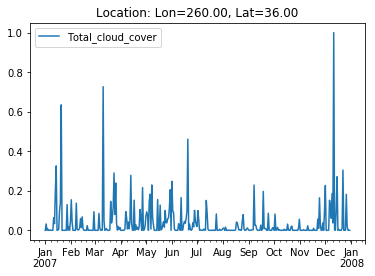

In [58]:
# Get all time records of variable [vname] at indices [iy,ix]
# Total_cloud_cover float32 ('time', 'ens', 'fhour', 'lat', 'lon') (5113, 11, 5, 9, 16)
vname = 'Total_cloud_cover'
# #vname = 'surf_el'
var = tcdc.variables[vname]
print(var.shape)
hs = var[istart:istop,:,0,iy,ix]
tim = dtime[istart:istop]
# print(hs)
# print(type(hs))

hs2 = np.mean(hs, 1)
hs3 = hs2/max(hs2)
# print(hs2)
print(max(hs3))
# # Create Pandas time series object
ts = pd.Series(hs3,index=tim,name=vname)
# print(ts)

# # Use Pandas time series plot method
# ts.plot(figsize(12,4),
#    title='Location: Lon=%.2f, Lat=%.2f' % ( lon[ix], lat[iy]),legend=True)
# plt.ylabel(var.units);
ts.plot(title='Location: Lon=%.2f, Lat=%.2f' % ( lon[ix], lat[iy]),legend=True)

# #write to a CSV file
ts.to_csv('time_series_from_tcdc_eatm_netcdf.csv')

254.0 269.0
6 5
260.0 36.0
0 364
(5113, 11, 5, 9, 16)
1.0


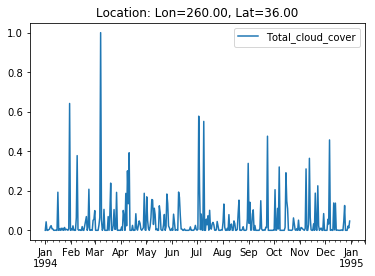

In [210]:
def generate_timeseries_from_netcdf(datanc, varname, lati, loni):
    lat = datanc.variables['lat'][:]
    lon = datanc.variables['lon'][:]
    time_var = datanc.variables['time']
    dtime = netCDF4.num2date(time_var[:],time_var.units)
    # determine what longitude convention is being used [-180,180], [0,360]
    print(lon.min(),lon.max())

    
    # # Find nearest point to desired location (could also interpolate, but more work)
    ix = near(lon, loni)
    iy = near(lat, lati)
    print(ix, iy)
    print(lon[ix], lat[iy])

    start = dt.datetime(1994, 1, 1, 0, 0)
    stop = dt.datetime(1994, 12, 31, 0, 0)
    
    istart = netCDF4.date2index(start,time_var,select='nearest')
    istop = netCDF4.date2index(stop,time_var,select='nearest')
    print(istart,istop)
    
    var = datanc.variables[varname]
    print(var.shape)
    hs = var[istart:istop,:,0,iy,ix]
    tim = dtime[istart:istop]
    # print(hs)
    # print(type(hs))

    hs2 = np.mean(hs, 1)
    hs3 = hs2/max(hs2)
    # print(hs2)
    print(max(hs3))
    # # Create Pandas time series object
    ts = pd.Series(hs3,index=tim,name=varname)
    # print(ts)

    # # Use Pandas time series plot method
    # ts.plot(figsize(12,4),
    #    title='Location: Lon=%.2f, Lat=%.2f' % ( lon[ix], lat[iy]),legend=True)
    # plt.ylabel(var.units);
    ts.plot(title='Location: Lon=%.2f, Lat=%.2f' % ( lon[ix], lat[iy]),legend=True)

    # #write to a CSV file
    csvfilename = 'time_series_from_' + varname + '.csv'
    ts.to_csv(csvfilename)

# specify some location to extract time series
lati = 36.07; loni = -99.90 +360.0
generate_timeseries_from_netcdf(tcdc, 'Total_cloud_cover', lati, loni)

254.0 269.0
6 5
260.0 36.0
0 5112
(5113, 11, 5, 9, 16)
1.0


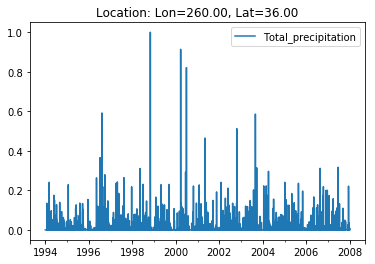

In [118]:
generate_timeseries_from_netcdf(apcp, 'Total_precipitation', lati, loni)


254.0 269.0
6 5
260.0 36.0
0 364
(5113, 11, 5, 9, 16)
1.0


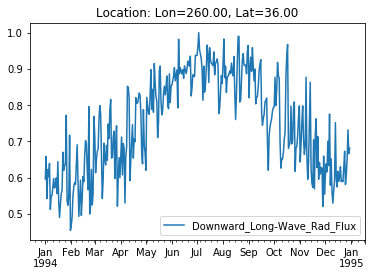

In [211]:
generate_timeseries_from_netcdf(dlwrf, 'Downward_Long-Wave_Rad_Flux', lati, loni)

254.0 269.0
6 5
260.0 36.0
0 364
(5113, 11, 5, 9, 16)
1.0


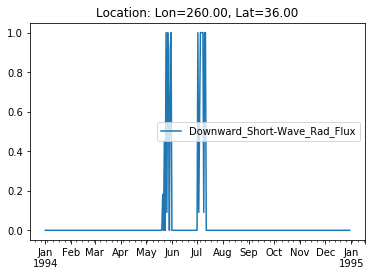

In [212]:
generate_timeseries_from_netcdf(dswrf, 'Downward_Short-Wave_Rad_Flux', lati, loni)

254.0 269.0
6 5
260.0 36.0
0 364
(5113, 11, 5, 9, 16)
1.0


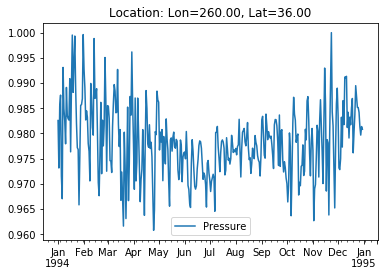

In [213]:
generate_timeseries_from_netcdf(pres, 'Pressure', lati, loni)

254.0 269.0
6 5
260.0 36.0
0 364
(5113, 11, 5, 9, 16)
1.0


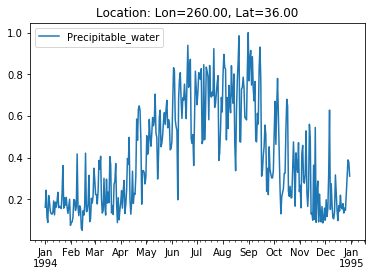

In [214]:
generate_timeseries_from_netcdf(pwat, 'Precipitable_water', lati, loni)

254.0 269.0
6 5
260.0 36.0
0 364
(5113, 11, 5, 9, 16)
1.0


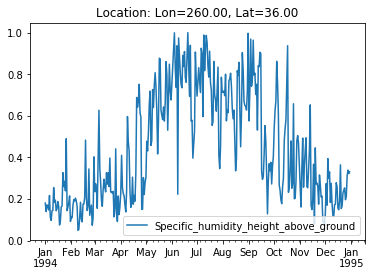

In [215]:
generate_timeseries_from_netcdf(spfh, 'Specific_humidity_height_above_ground', lati, loni)

254.0 269.0
6 5
260.0 36.0
0 5112
(5113, 11, 5, 9, 16)
1.0


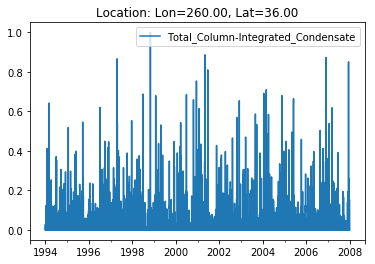

In [123]:
generate_timeseries_from_netcdf(tcolc, 'Total_Column-Integrated_Condensate', lati, loni)

254.0 269.0
6 5
260.0 36.0
0 364
(5113, 11, 5, 9, 16)
1.0


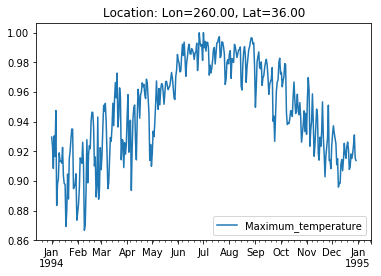

In [216]:
generate_timeseries_from_netcdf(tmax, 'Maximum_temperature', lati, loni)

254.0 269.0
6 5
260.0 36.0
0 364
(5113, 11, 5, 9, 16)
1.0


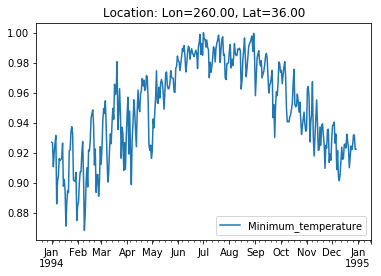

In [217]:
generate_timeseries_from_netcdf(tmin, 'Minimum_temperature', lati, loni)

254.0 269.0
6 5
260.0 36.0
0 364
(5113, 11, 5, 9, 16)
1.0


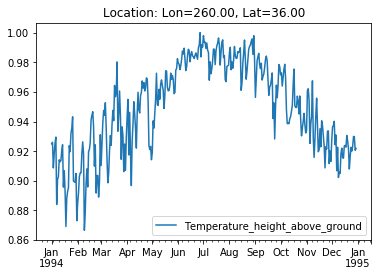

In [218]:
generate_timeseries_from_netcdf(tmp2m, 'Temperature_height_above_ground', lati, loni)

254.0 269.0
6 5
260.0 36.0
0 364
(5113, 11, 5, 9, 16)
1.0


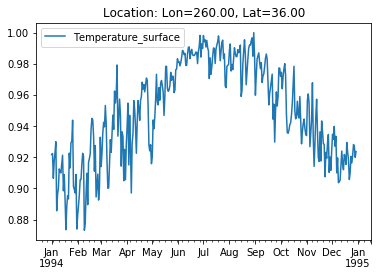

In [219]:
generate_timeseries_from_netcdf(tmpsfc, 'Temperature_surface', lati, loni)

254.0 269.0
6 5
260.0 36.0
0 364
(5113, 11, 5, 9, 16)
1.0


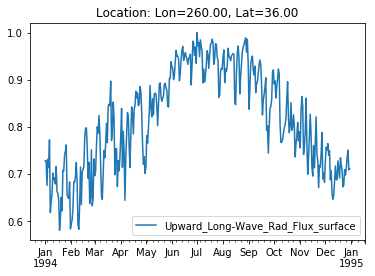

In [220]:
generate_timeseries_from_netcdf(ulwrf_sfc, 'Upward_Long-Wave_Rad_Flux_surface', lati, loni)

254.0 269.0
6 5
260.0 36.0
0 364
(5113, 11, 5, 9, 16)
1.0


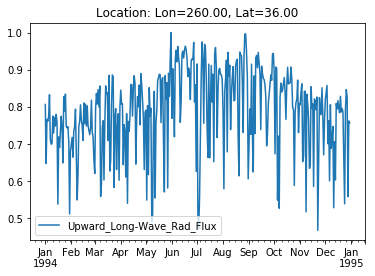

In [221]:
generate_timeseries_from_netcdf(ulwrf_tatm, 'Upward_Long-Wave_Rad_Flux', lati, loni)

254.0 269.0
6 5
260.0 36.0
0 5112
(5113, 11, 5, 9, 16)
--


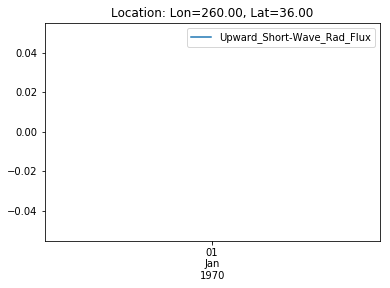

In [130]:
generate_timeseries_from_netcdf(uswrf_sfc, 'Upward_Short-Wave_Rad_Flux', lati, loni)

In [131]:
# Read in all dimensions (lat x lon x time) below 
print('# of dimension: ', tcdc.variables['Total_cloud_cover'].ndim)
tcdcdim = tcdc.variables['Total_cloud_cover'][:,:,:,:,:] 
# print(apcpdim)

# Compute the dimension sizes: time, ens, fhour, lat, lon
ntime, nens, fhour, nlat, nlon  = np.shape(tcdcdim)
print(ntime)
print(nlat)
print(nlon)
print(nens)
print(fhour)

for att in tcdc.ncattrs():
    print(getattr(tcdc,att))  
#     setattr(nco,att,getattr(f,att))

for att in tcdc.variables['Total_cloud_cover'].ncattrs():
    print(getattr(tcdc.variables['Total_cloud_cover'],att))   
#     setattr(nco.variables[var],att,getattr(f.variables[var],att))

# of dimension:  5
5113
9
16
11
5
CF-1.0
Subset of data from 2nd-generation multi-decadal ensemble reforecast generated from the NCEP Global Ensemble Forecast System, mimicking version operational at NCEP/EMC circa mid-2012.
NOAA Earth System Research Laboratory (ESRL)
NCEP GFS v 9.01, T254L42.  Control initial conditions from CFSRR.  Perturbed initial conditions from ETR.  Model error simulated with STTP.
http://www.esrl.noaa.gov/psd/forecasts/reforecast2/index.html
Subset created 2013-01-15 19:19:01 UTC
Original dataset generated on DOE's supercomputers at Lawrence Berkeley Laboratory through ALCC/ASCR grant.
9999.0
percent
Total_cloud_cover @ entire_atmosphere
Meteorological_products
Cloud
Total_cloud_cover
Forecast
[2 0 6 1]
0
Analysis/forecast at horizontal level/layer at a point in time
200
entire_atmosphere
easterlyNortherlyRelative


In [ ]:
#This box converts the feature (pressure) into a dictionary. Once I got this working 
#I used this to create a function to pass all features through

#Let's grab that variable and look at the shape
# cloudcover = tcdc.variables.values()[-1]

# #Create output lists and dictionaries
# lat_lon =[]
# cc_list =[]
# cloudcover_dict = {}

# for l in list(range(len(lat))): #Length of latitude array    
#     for n in list(range(len(lon))): #Length of longitude array    
#         lat_lon.append(np.column_stack((lat[l],lon[n])))

#         temp = list(pressure[:,:,:,l,n])
# 		pcp = np.median(temp, axis=1) #Outputs median of the five models
# 		#pcp = np.column_stack((t,pcp)) #This adds the time column. Not working.

# 		#pcp_av = np.median(pcp,axis=1).tolist() #Outputs the median of the median as values
# 		pcp_av = np.median(pcp,axis=1) #Outputs the median of the median
# 		#pcp_av = np.column_stack((t,pcp_av)) #This adds the time column. Not working.

#         #This converts to csv if required
# 		#np.savetxt('pcp_'+str(int(lat[l]))+'_'+str(int(lon[n]))+'.csv', pcp, delimiter = ",", fmt = "%.06f" )
# 		#np.savetxt('pcp_av_'+str(int(lat[l]))+'_'+str(int(lon[n]))+'.csv', pcp_av, delimiter = ",", fmt = "%.06f" )

# 		p_list.append([[int(lat[l]),int(lon[n])],pcp_av])

# #Create data dictionary for precipitation where the key is lat/long and value is the pressure over time
# for n in range(len(p_list)):
# 	k = tuple(p_list[n][0])
# 	#key = tuple(key)
# 	v = p_list[n][1]
# 	press_dict[k] = [v]

# print press_dict

In [ ]:
#close the opened netCDF dataset
apcp.close()
dlwrf.close()
dswrf.close()
pres.close()
pwat.close()
spfh.close()
tcdc.close() 
tcolc.close()
tmax.close() 
tmin.close()
tmp2m.close()
tmpsfc.close()
ulwrf_sfc.close()
ulwrf_tatm.close()
uswrf_sfc.close()

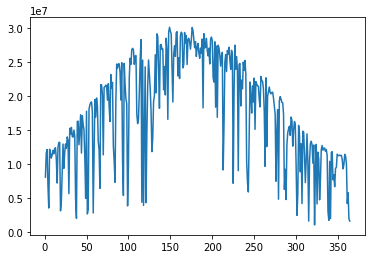

In [155]:
powderdf = pd.read_csv("train.csv")
df = powderdf["ARNE"][1:365]
df.plot.line()

In [156]:
powderdf.head()
# powderdf.dtypes

,Date,ACME,ADAX,ALTU,APAC,ARNE,BEAV,BESS,BIXB,BLAC,...,VINI,WASH,WATO,WAUR,WEAT,WEST,WILB,WIST,WOOD,WYNO
0,19940101,12384900,11930700,12116700,12301200,10706100,10116900,11487900,11182800,10848300,...,10771800,12116400,11308800,12361800,11331600,10644300,11715600,11241000,10490100,10545300
1,19940102,11908500,9778500,10862700,11666400,8062500,9262800,9235200,3963300,3318300,...,4314300,10733400,9154800,12041400,9168300,4082700,9228000,5829900,7412100,3345300
2,19940103,12470700,9771900,12627300,12782700,11618400,10789800,11895900,4512600,5266500,...,2976900,11775000,10700400,12687300,11324400,2746500,3686700,4488900,9712200,4442100
3,19940104,12725400,6466800,13065300,12817500,12134400,11816700,12186600,3212700,8270100,...,3476400,12159600,11907000,12953100,11903700,2741400,4905000,4089300,11401500,4365000
4,19940105,10894800,11545200,8060400,10379400,6918600,9936300,6411300,9566100,8009400,...,6393300,11419500,7334400,10178700,7471500,8235300,11159100,10651500,10006200,8568300


In [157]:
tcdc = pd.read_csv('time_series_from_Total_cloud_cover.csv')
tspd.head()
tspd.dtypes


1994-01-01     object
0.0           float64
dtype: object

In [181]:
def add_weather_x(powderdf, tsdf2, colname):

    for idx, row in tsdf2.iterrows():
        val = row[1]
#         print(type(val))
#pd.to_numeric(val, errors='coerce')
        powderdf.loc[idx, colname] = val 
        
    return powderdf

In [196]:
# arnfdf = powderdf["ARNE"]
# t = 20070530
#powderdf['Date'] = pd.to_datetime(powderdf['Date'], format='%Y%mm%dd')

# powderdf['DateTime'] = powderdf['Date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
# powderdf.head()
# add new columns
# print(powderdf.shape[0])
tcdc_pd = pd.read_csv('time_series_from_Total_cloud_cover.csv')
apcp_pd = pd.read_csv('time_series_from_Total_precipitation.csv')
dlwrf_pd = pd.read_csv('time_series_from_Downward_Long-Wave_Rad_Flux.csv')
dswrf_pd = pd.read_csv('time_series_from_Downward_Short-Wave_Rad_Flux.csv')
pres_pd = pd.read_csv('time_series_from_Pressure.csv')
pwat_pd = pd.read_csv('time_series_from_Precipitable_water.csv')
spfh_pd = pd.read_csv('time_series_from_Specific_humidity_height_above_ground.csv')
tcolc_pd = pd.read_csv('time_series_from_Total_Column-Integrated_Condensate.csv')
tmax_pd = pd.read_csv('time_series_from_Maximum_temperature.csv')
tmin_pd = pd.read_csv('time_series_from_Minimum_temperature.csv')
tmp2m_pd = pd.read_csv('time_series_from_Temperature_height_above_ground.csv')
tmpsfc_pd = pd.read_csv('time_series_from_Temperature_surface.csv')
ulwrf_sfc_pd = pd.read_csv('time_series_from_Upward_Long-Wave_Rad_Flux_surface.csv')
ulwrf_tatm_pd = pd.read_csv('time_series_from_Upward_Long-Wave_Rad_Flux.csv')

 

# print(powderdf.shape[0])
# powderdf = add_weather_x(powderdf, tcdc_pd, 'Total_cloud_cover')
# powderdf = add_weather_x(powderdf, apcp_pd, 'Total_precipitation')
# powderdf = add_weather_x(powderdf, dlwrf_pd, 'Downward_Long-Wave_Rad_Flux')
# powderdf = add_weather_x(powderdf, dswrf_pd, 'Downward_Short-Wave_Rad_Flux')
# powderdf = add_weather_x(powderdf, pres_pd, 'Pressure')
# powderdf = add_weather_x(powderdf, pwat_pd, 'Precipitable_water')
# powderdf = add_weather_x(powderdf, spfh_pd, 'Specific_humidity_height_above_ground')
# powderdf = add_weather_x(powderdf, tcolc_pd, 'Total_Column-Integrated_Condensate')
# powderdf = add_weather_x(powderdf, tmax_pd, 'Maximum_temperature')
# powderdf = add_weather_x(powderdf, tmin_pd, 'Minimum_temperature')
# powderdf = add_weather_x(powderdf, tmp2m_pd, 'Temperature_height_above_ground')
# powderdf = add_weather_x(powderdf, tmpsfc_pd, 'Temperature_surface')
# powderdf = add_weather_x(powderdf, ulwrf_sfc_pd, 'Upward_Long-Wave_Rad_Flux_surface')
# powderdf = add_weather_x(powderdf, ulwrf_tatm_pd, 'Upward_Long-Wave_Rad_Flux')

# powderdf2 = pd.concat(powderdf, tcdc_pd[1])
# powderdf2.head()


In [202]:
powderdf["Total_cloud_cover"] = tcdc_pd.iloc[:,1]
powderdf["Total_precipitation"] = apcp_pd.iloc[:,1]
powderdf["Downward_Long-Wave_Rad_Flux"] = dlwrf_pd.iloc[:,1]
powderdf["Downward_Short-Wave_Rad_Flux"] = dswrf_pd.iloc[:,1]
powderdf["Pressure"] = pres_pd.iloc[:,1]
powderdf["Precipitable_water"] = pwat_pd.iloc[:,1]
powderdf["Specific_humidity_height_above_ground"] = spfh_pd.iloc[:,1]
powderdf["Total_Column-Integrated_Condensate"] = tcolc_pd.iloc[:,1]
powderdf["Downward_Long-Wave_Rad_Flux"] = tmax_pd.iloc[:,1]
powderdf["Minimum_temperature"] = tmin_pd.iloc[:,1]
powderdf["Temperature_height_above_ground"] = tmp2m_pd.iloc[:,1]
powderdf["Temperature_surface"] = tmpsfc_pd.iloc[:,1]
powderdf["Upward_Long-Wave_Rad_Flux_surface"] = ulwrf_sfc_pd.iloc[:,1]
powderdf["Upward_Long-Wave_Rad_Flux"] = ulwrf_tatm_pd.iloc[:,1]


In [203]:
# powderdf.head
powderdf.describe()

,Date,ACME,ADAX,ALTU,APAC,ARNE,BEAV,BESS,BIXB,BLAC,...,Precipitable_water,Specific_humidity_height_above_ground,Total_Column-Integrated_Condensate,Minimum_temperature,Temperature_height_above_ground,Temperature_surface,Upward_Long-Wave_Rad_Flux_surface,Upward_Long-Wave_Rad_Flux,Maximum_temperature,Total_precipitation
count,5.113000e+03,5.113000e+03,5.113000e+03,5.113000e+03,5.113000e+03,5.113000e+03,5.113000e+03,5.113000e+03,5.113000e+03,5.113000e+03,...,5111.000000,5111.000000,5111.000000,5111.000000,5111.000000,5111.000000,5111.000000,5111.000000,5111.000000,5111.000000
mean,2.000567e+07,1.687746e+07,1.623753e+07,1.711919e+07,1.701057e+07,1.756017e+07,1.761214e+07,1.730407e+07,1.596963e+07,1.606171e+07,...,0.347224,0.350538,0.031347,0.946275,0.946883,0.945234,0.796836,0.773179,0.942617,0.009678
std,4.031286e+04,7.869606e+06,7.905850e+06,7.702989e+06,7.883455e+06,7.917965e+06,7.911267e+06,7.868140e+06,8.062981e+06,7.770310e+06,...,0.206043,0.210598,0.080975,0.030456,0.030165,0.030649,0.103724,0.110964,0.031195,0.039680
min,1.994010e+07,1.200000e+04,5.100000e+05,9.000000e+02,3.300000e+03,4.773000e+05,3.000000e+02,5.106000e+05,7.470000e+04,3.600000e+04,...,0.031592,0.023789,0.000000,0.841131,0.845157,0.844373,0.481514,0.318384,0.844431,0.000000
25%,1.997070e+07,1.140420e+07,1.061100e+07,1.167450e+07,1.163700e+07,1.166640e+07,1.149360e+07,1.171260e+07,9.794700e+06,1.048576e+07,...,0.172575,0.168234,0.000305,0.922802,0.923447,0.920979,0.713754,0.717304,0.918414,0.000000
50%,2.000123e+07,1.694640e+07,1.629930e+07,1.707360e+07,1.706250e+07,1.757850e+07,1.752090e+07,1.717650e+07,1.572570e+07,1.587300e+07,...,0.292004,0.294403,0.002153,0.947439,0.947870,0.945795,0.795792,0.785328,0.944147,0.000000
75%,2.004070e+07,2.373480e+07,2.302740e+07,2.390370e+07,2.390940e+07,2.450370e+07,2.468310e+07,2.424120e+07,2.294040e+07,2.293830e+07,...,0.504063,0.522699,0.022038,0.973683,0.973982,0.973463,0.890057,0.855944,0.969710,0.001548
max,2.007123e+07,3.134790e+07,3.122700e+07,3.141150e+07,3.161610e+07,3.264570e+07,3.288480e+07,3.188790e+07,3.170220e+07,3.077190e+07,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [204]:
def print_row_headers(df):
    for h in list(df):
        print (h)
print_row_headers(powderdf)
powderdf.dtypes

Date
ACME
ADAX
ALTU
APAC
ARNE
BEAV
BESS
BIXB
BLAC
BOIS
BOWL
BREC
BRIS
BUFF
BURB
BURN
BUTL
BYAR
CAMA
CENT
CHAN
CHER
CHEY
CHIC
CLAY
CLOU
COOK
COPA
DURA
ELRE
ERIC
EUFA
FAIR
FORA
FREE
FTCB
GOOD
GUTH
HASK
HINT
HOBA
HOLL
HOOK
HUGO
IDAB
JAYX
KENT
KETC
LAHO
LANE
MADI
MANG
MARE
MAYR
MCAL
MEDF
MEDI
MIAM
MINC
MTHE
NEWK
NINN
NOWA
OILT
OKEM
OKMU
PAUL
PAWN
PERK
PRYO
PUTN
REDR
RETR
RING
SALL
SEIL
SHAW
SKIA
SLAP
SPEN
STIG
STIL
STUA
SULP
TAHL
TALI
TIPT
TISH
VINI
WASH
WATO
WAUR
WEAT
WEST
WILB
WIST
WOOD
WYNO
Total_cloud_cover
Total_precipitatio
Downward_Long-Wave_Rad_Flux
Downward_Short-Wave_Rad_Flux
Pressure
Precipitable_water
Specific_humidity_height_above_ground
Total_Column-Integrated_Condensate
Minimum_temperature
Temperature_height_above_ground
Temperature_surface
Upward_Long-Wave_Rad_Flux_surface
Upward_Long-Wave_Rad_Flux
Maximum_temperature
Total_precipitation


Date                                       int64
ACME                                       int64
ADAX                                       int64
ALTU                                       int64
APAC                                       int64
ARNE                                       int64
BEAV                                       int64
BESS                                       int64
BIXB                                       int64
BLAC                                       int64
BOIS                                       int64
BOWL                                       int64
BREC                                       int64
BRIS                                       int64
BUFF                                       int64
BURB                                       int64
BURN                                       int64
BUTL                                       int64
BYAR                                       int64
CAMA                                       int64
CENT                

In [205]:
keep_list = ["Date", "ARNE", "Total_cloud_cover",
             "Total_precipitation",
             "Downward_Long-Wave_Rad_Flux",
             "Downward_Short-Wave_Rad_Flux",
             "Pressure",
             "Precipitable_water",
             "Specific_humidity_height_above_ground",
             "Total_Column-Integrated_Condensate",
             "Minimum_temperature",
             "Temperature_height_above_ground",
             "Temperature_surface",
             "Upward_Long-Wave_Rad_Flux_surface",
             "Upward_Long-Wave_Rad_Flux",
             "Maximum_temperature"]

In [209]:
reduced_df = powderdf[keep_list]
reduced_df.describe()
# #write to a CSV file
csvfilename = 'arne_data.csv'
reduced_df.to_csv(csvfilename,index=False)